# Exploration

The data used in this notebook were found online on Free Internet Chess Server (FICS) https://www.ficsgames.org/download.html

Before exploring the data, we need to figure out how the chess library in Python works.

In [1]:
# importing the needed libraries
import pandas as pd 
import chess.pgn
import chess

* Checking how many lines the .pgn file has

In [2]:
! wc -l ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

 19191183 /Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn


* Taking a look at the format of the data, to figure out what we need and what not for our analysis

In [3]:
! head -20 ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

* Counting how many times the word 'FICSGamesDBGameNo' appears in the file, which indicates 

In [4]:
! grep FICSGamesDBGameNo ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn | wc -l

  955855


As we can observe there are 955,855 games for January 2017. 

In [5]:
# reading in the data
pgn = open("/Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn")

In order to run our analysis faster we are going to get a subset of data.

Notes:
- When there are a lot of moves, the following doesn't show until the check mate, wierd

Following there is an example of how to print a hierarchical chart 
https://plot.ly/python/tree-plots/

another example in this link: https://plot.ly/~empet/14305/a-tree-with-improved-walker-layout-1/#plot

## Trying to create the list to viz

In [6]:
first_game = chess.pgn.read_game(pgn)
board = chess.Board()
moves = first_game.main_line()
node = first_game
while node.variations:
    next_node = node.variation(0)
#     print(next_node)

    print(next_node.move)  #prints the origin square and the destination square
    b = next_node.move.to_square
#     print(b)
    a = node.board().san(next_node.move)[-2:]
    print(a)
    board.push_san(node.board().san(next_node.move))
    print(board.piece_at(next_node.move.to_square))  #prints the piece that was moved
    
    print(board)
    
    print(board.is_game_over())
    node = next_node

d2d4
d4
P
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
False
d7d5
d5
p
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
False
b1c3
c3
N
r n b q k b n r
p p p . p p p p
. . . . . . . .
. . . p . . . .
. . . P . . . .
. . N . . . . .
P P P . P P P P
R . B Q K B N R
False
g8f6
f6
n
r n b q k b . r
p p p . p p p p
. . . . . n . .
. . . p . . . .
. . . P . . . .
. . N . . . . .
P P P . P P P P
R . B Q K B N R
False
c1f4
f4
B
r n b q k b . r
p p p . p p p p
. . . . . n . .
. . . p . . . .
. . . P . B . .
. . N . . . . .
P P P . P P P P
R . . Q K B N R
False
e7e6
e6
p
r n b q k b . r
p p p . . p p p
. . . . p n . .
. . . p . . . .
. . . P . B . .
. . N . . . . .
P P P . P P P P
R . . Q K B N R
False
f2f3
f3
P
r n b q k b . r
p p p . . p p p
. . . . p n . .
. . . p . . . .
. . . P . B . .
. . N . . P . .
P P P . P . P P
R . . Q K B N 

r
. . r . . . k .
. . r . . p . p
. p . . p . p .
p . . p P . P .
P . . P . . . P
. P P . . . . .
. . K . . R . .
. . . . . R . .
False
f2f3
f3
R
. . r . . . k .
. . r . . p . p
. p . . p . p .
p . . p P . P .
P . . P . . . P
. P P . . R . .
. . K . . . . .
. . . . . R . .
False
g8g7
g7
k
. . r . . . . .
. . r . . p k p
. p . . p . p .
p . . p P . P .
P . . P . . . P
. P P . . R . .
. . K . . . . .
. . . . . R . .
False
f1e1
e1
R
. . r . . . . .
. . r . . p k p
. p . . p . p .
p . . p P . P .
P . . P . . . P
. P P . . R . .
. . K . . . . .
. . . . R . . .
False
h7h6
h6
p
. . r . . . . .
. . r . . p k .
. p . . p . p p
p . . p P . P .
P . . P . . . P
. P P . . R . .
. . K . . . . .
. . . . R . . .
False
f3h3
h3
R
. . r . . . . .
. . r . . p k .
. p . . p . p p
p . . p P . P .
P . . P . . . P
. P P . . . . R
. . K . . . . .
. . . . R . . .
False
c8h8
h8
r
. . . . . . . r
. . r . . p k .
. p . . p . p p
p . . p P . P .
P . . P . . . P
. P P . . . . R
. . K . . . . .
. . . . R . . .
False


d4
k
. . . . . . . .
. . P . . . . .
. . . . p . . .
. . . p P . . .
. . . k . . . .
. K . . . . . .
. . . . . . . .
. . . . . . . .
False
c7c8q
=Q
Q
. . Q . . . . .
. . . . . . . .
. . . . p . . .
. . . p P . . .
. . . k . . . .
. K . . . . . .
. . . . . . . .
. . . . . . . .
False


## Start from here

In [88]:
initial_list = []
for i in range(10):
    first_game = chess.pgn.read_game(pgn)
    board = chess.Board()
    moves = first_game.main_line()
    node = first_game
    a = 0
    list1 = []
    i = 1
    while node.variations:
        next_node = node.variation(0)
        b = str(next_node.move)[-2:]  #take the following position
        list1.append((str(i-1)+str(a),str(i)+str(b)))
        a = b
        board.push_san(node.board().san(next_node.move))
        node = next_node
        if len(list1) > 3:  #take a subset for depth
            break
        i += 1
#     initial_list = initial_list + [i for i in list1 if i not in initial_list]  #there is a concern with that
    initial_list = initial_list + list1

In [89]:
initial_list

[('00', '1g4'),
 ('1g4', '2e5'),
 ('2e5', '3g2'),
 ('3g2', '4c6'),
 ('00', '1d4'),
 ('1d4', '2f6'),
 ('2f6', '3c4'),
 ('3c4', '4e6'),
 ('00', '1e4'),
 ('1e4', '2e6'),
 ('2e6', '3f3'),
 ('3f3', '4d5'),
 ('00', '1e4'),
 ('1e4', '2d5'),
 ('2d5', '3d5'),
 ('3d5', '4d5'),
 ('00', '1d3'),
 ('1d3', '2e5'),
 ('2e5', '3f3'),
 ('3f3', '4c6'),
 ('00', '1c4'),
 ('1c4', '2e5'),
 ('2e5', '3c3'),
 ('3c3', '4f6'),
 ('00', '1d4'),
 ('1d4', '2d5'),
 ('2d5', '3c4'),
 ('3c4', '4e6'),
 ('00', '1g3'),
 ('1g3', '2e6'),
 ('2e6', '3g2'),
 ('3g2', '4f5'),
 ('00', '1e3'),
 ('1e3', '2e5'),
 ('2e5', '3c3'),
 ('3c3', '4d5'),
 ('00', '1e4'),
 ('1e4', '2e6'),
 ('2e6', '3f3'),
 ('3f3', '4d6')]

### Plot - None hierarcical (for now)

In [90]:
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
import networkx as nx
import matplotlib.pyplot as plt
import collections
from plotly.offline import init_notebook_mode, plot
from networkx.drawing.nx_agraph import graphviz_layout
init_notebook_mode(connected=True)

In [91]:
node1 = [n[0] for n in initial_list]
node2 = [n[1] for n in initial_list]
node1.extend(node2)
my_nodes = list(set(node1))
my_nodes.sort()

In [92]:
G=nx.Graph()
# my_nodes=range(len(my_nodes))
G.add_nodes_from(my_nodes)
my_edges=initial_list
G.add_edges_from(my_edges)

In [111]:
pos=nx.fruchterman_reingold_layout(G) 

In [94]:
pos=collections.OrderedDict(sorted(pos.items()))

In [95]:
Xn=[pos[k][0] for k in pos.keys()]
Yn=[pos[k][1] for k in pos.keys()]

In [96]:
labels=my_nodes

In [97]:
trace_nodes=dict(type='scatter',
                 x=Xn, 
                 y=Yn,
                 mode='markers',
                 marker=dict(symbol='dot', size=28, color='rgb(0,240,0)'),
                 text=labels,
                 hoverinfo='text')

In [98]:
Xe=[]
Ye=[]
for e in G.edges():
    Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
    Ye.extend([pos[e[0]][1], pos[e[1]][1], None])

In [99]:
trace_edges=dict(type='scatter',
                 mode='lines',
                 x=Xe,
                 y=Ye,
                 line=dict(width=1, color='rgb(25,25,25)'),
                 hoverinfo='none' 
                )

In [100]:
axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )
layout=dict(title= 'Graph',  
            font= dict(family='Balto'),
            width=600,
            height=600,
            autosize=False,
            showlegend=False,
            xaxis=axis,
            yaxis=axis,
            margin=dict(
            l=40,
            r=40,
            b=85,
            t=100,
            pad=0,
       
    ),
    hovermode='closest',
    plot_bgcolor='#efecea', #set background color            
    )


fig = dict(data=[trace_edges, trace_nodes], layout=layout)

In [101]:
def make_annotations(pos, anno_text, font_size=14, font_color='rgb(10,10,10)'):
    L=len(pos)
    if len(anno_text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    i = 0
    for k in pos.keys():
        annotations.append(dict(text=anno_text[i], 
                                x=pos[k][0], 
                                y=pos[k][1]+0.075,#this additional value is chosen by trial and error
                                xref='x1', yref='y1',
                                font=dict(color= font_color, size=font_size),
                                showarrow=False)
                          )
        i += 1
    return annotations  

In [102]:
fig['layout'].update(annotations=make_annotations(pos, labels))

In [103]:
plotly.offline.iplot(fig, filename='Tree-Reingold-Tilf')

In [122]:
import networkx as nx

def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5 ):
    '''If there is a cycle that is reachable from root, then result will not be a hierarchy.

       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
    '''

    def h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos = None, parent = None, parsed = [] ):
        if(root not in parsed):
            parsed.append(root)
            if pos == None:
                pos = {root:(xcenter,vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)
            neighbors = G.neighbors(root)
            if parent != None:
                neighbors.remove(parent)
            if len(neighbors)!=0:
                dx = width/len(neighbors) 
                nextx = xcenter - width/2 - dx/2
                for neighbor in neighbors:
                    nextx += dx
                    pos = h_recur(G,neighbor, width = dx, vert_gap = vert_gap, 
                                        vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, 
                                        parent = root, parsed = parsed)
        return pos

    return h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5)

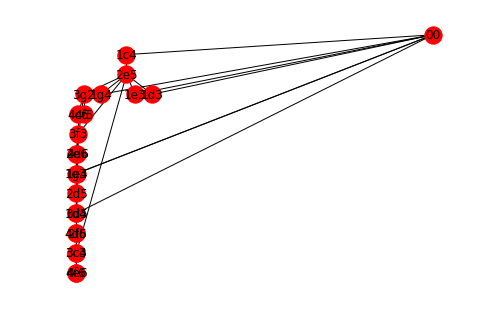

In [123]:
G=nx.Graph()
G.add_edges_from(initial_list)
pos = hierarchy_pos(G,'00')    
nx.draw(G, pos=pos, with_labels=True)

In [121]:
G=nx.Graph()
G.add_node(1,level=1)
G.add_node(2,level=2)
G.add_node(3,level=2)
G.add_node(4,level=3)

G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)


G.add_edges_from(initial_list)
pos = hierarchy_pos(G,'00')    
nx.draw(G, pos=pos, with_labels=True)

nx.draw(G, pos=graphviz_layout(G), node_size=1600, cmap=plt.cm.Blues,
        node_color=range(len(G)),
        prog='dot')
plt.show()

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [120]:
import networkx as nx

print nx.__version__

G = nx.DiGraph()
G.add_node(1,level=1)
G.add_node(2,level=2)
G.add_node(3,level=2)
G.add_node(4,level=3)

G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)

import pylab as plt
nx.drawing.nx_agraph.graphviz_layout(G)
plt.show()

1.11


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

Two problems right now:
- recursion
- positioning

For hierarcical networks:
- https://plot.ly/python/tree-plots/ (but I couldn't get igraph to work and recursion is not solved)
- https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa (after that example, I think we really need to create our own function)